In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import random
from numpy import random
from numpy import pi

In [2]:
phiH=np.array([[0.3425250914E+01,0.1543289673E+00],[0.6239137298E+00, 0.5353281423E+00],[0.1688554040E+00,0.4446345422E+00]])
phiHe=np.array([[0.6362421394E+01,0.1543289673E+00],[0.1158922999E+01,0.5353281423E+00],[0.3136497915E+00,0.4446345422E+00]])
RH=[0,0,0]
RHe=[1.4632,0,0]
HeH=np.array([-0.20248149,
        -0.87660401])
H2=np.array([[0.53781331],
        [0.53781331]])

In [3]:
#shape of r :list of point, spartial index
#shape of E : list of point
def phiGF(a,r):
    if np.ndim(r)==1:
        return (2*a/pi)**(3/4)*np.exp(-a*np.linalg.norm(r)**2)
    else:
        aa=a.reshape((len(a),1))
        rr=r.reshape((1,len(r),len(r[0])))
        return (2*aa/pi)**(3/4)*np.exp(-aa*np.linalg.norm(rr,axis=-1)**2)

def phiCGF(phi1,r1,R1):
# r1: spartial index, R1: spartial index
# phiCGF: scalar
# d: basis index a:basis index
    d=phi1[:,1]
    a=phi1[:,0]
    return np.dot(d,phiGF(a,r1-np.array(R1)))

def Ei(r1,r2,Z,R):
    E=0
    for i in range(2):
        E=E-Z[i]/np.linalg.norm(r1-R[i],axis=1)-Z[i]/np.linalg.norm(r2-R[i],axis=1)
    return E

def NablaphiCGF(phi1,r1,R1):
    # return points
    d=phi1[:,1]
    a=phi1[:,0]
    return np.dot(d,(3*a.reshape((len(a),1))-2*a.reshape((len(a),1))**2*\
                     np.reshape(np.linalg.norm(r1-R1,axis=-1)**2,(1,len(r1))))*phiGF(a,r1-R1))

def Ek(r1,r2,C,phi,R):
    #r points*spatial
    Ekr=0
    for i in range(len(C)):
        Ekr+=C[i]*NablaphiCGF(phi[i],r1,R[i])/psi(r1,C,phi,R)+\
        C[i]*NablaphiCGF(phi[i],r2,R[i])/psi(r2,C,phi,R)
        
    return Ekr
    
def Eee(r1,r2):
    return 1/np.linalg.norm(r1-r2,axis=1)

# sample: dimension 1: list of point; dimension 2 : r1,r2 dimension 3: spatial coordinate
def E(samples,C,phi,R,Z):
    return Ei(samples[:,0,:],samples[:,1,:],Z,R)+\
Ek(samples[:,0,:],samples[:,1,:],C,phi,R)+Eee(samples[:,0,:],samples[:,1,:])+Z[0]*Z[1]/np.linalg.norm(np.array(R[0])-R[1])

def totalEnergy(samples,C,phi,R,Z):
    return np.average(E(samples,C,phi,R,Z))
#+1/1.2



In [4]:

#s dimension: 2*3
def psi(r,C,phi,R):
    psir=0
    for i in range(len(C)):
        psir+=C[i]*phiCGF(phi[i],r,R[i])
    return psir

def P(s,C,phi,R):
    r1=s[0]
    r2=s[1]
    phir1=psi(r1,C,phi,R)
    phir2=psi(r2,C,phi,R)
    return np.conj(phir1)*phir1*np.conj(phir2)*phir2

# shape of P: list of point

###This sampling function only generate the sampling point but gives no energy
def sampling(Npoints,C,phi,R):
    width=1
    s=random.uniform(width,-width,(2,3))
    #if P(s)<1E-9:
     #   s=random.uniform(width,-width)
    sample=np.zeros((Npoints,2,3))
    for i in range(Npoints):
        news=s+random.uniform(-width,width,(2,3));
        rnd=random.random()
        if rnd<P(news,C,phi,R)/P(s,C,phi,R):
            s=news
        sample[i]=s
    return sample
            

def display(sample,i,j):
    # ℹ 表示第几个电子，j表示xyz
    profile=np.array([x[i][j] for x in sample])
    plt.hist(profile,bins=100)
    plt.title("distribution")
    plt.show()


In [11]:
def blockanaylis(EE):
    Var=[]
    Np=len(EE)
    
    #Nblist=[i for i in range(1,51) if Np%i==0]
    #Nblist=[1000,2000,5000,10000,12500,20000,25000,40000,50000,62500,100000,125000,200000,250000,500000]
    Nlist=[2,5,8,10,16,20,25,40,50,80,100,125,160,200,250,320,400,500,625,800,1000]
    #Nlist=[len(EE)/i for i in Nblist]
    Nblist=[len(EE)//i for i in Nlist]
    for Nb in Nblist:
        eblock=np.average(EE.reshape((Nb,Np//Nb)),axis=1)
        Var.append(np.var(eblock)/Nb)
    plt.plot(Nlist,Var,'.')
    #plt.savefig("block.png")
    plt.show()
    pass
   

In [13]:
Nlist=[2,5,8,10,16,20,25,40,50,80,100,125,160,200,250,320,400,500,625,800,1000]
Nblist=[1000000//i for i in Nlist]
print(Nblist)

[500000, 200000, 125000, 100000, 62500, 50000, 40000, 25000, 20000, 12500, 10000, 8000, 6250, 5000, 4000, 3125, 2500, 2000, 1600, 1250, 1000]


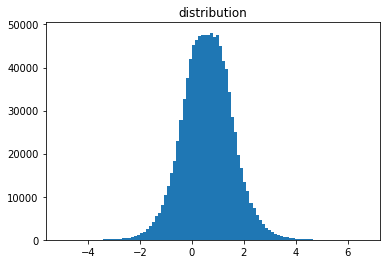

total energy= -1.1117708767645607


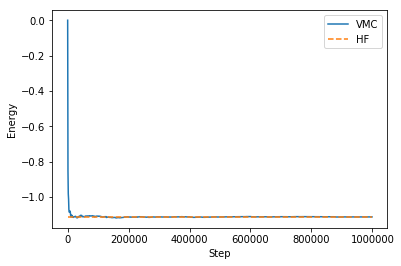

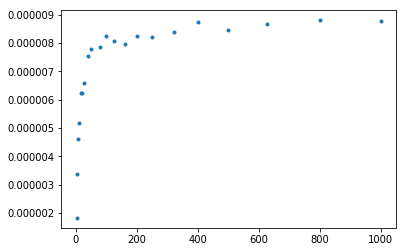

In [14]:
N=1000000
Z0=[1,1]
phi0=[phiH,phiH]
R0=[RH,[1.2,0,0]]
#sampling(N,H2,phi0,R0,Z0)
s=sampling(N,H2,phi0,R0)
display(s,0,0)
print("total energy=",totalEnergy(s,H2,phi0,R0,Z0))
Ee=E(s,H2,phi0,R0,Z0)

#### show energy by steps
displaystep=1000
Nmark=N//displaystep
ea=np.zeros(Nmark)
for i in range(1,Nmark):
    ea[i]=np.average(Ee[0:i*displaystep])
plt.plot(np.arange(Nmark)*displaystep,ea,label="VMC")
plt.plot(np.arange(Nmark)*displaystep,-1.110333882489139*np.ones(Nmark),'--',label="HF")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.legend()
#plt.savefig("step.png")
plt.show()

blockanaylis(Ee)

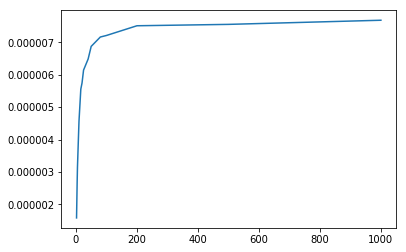

In [19]:
blockanaylis(Ee)

此处蒙特卡罗算符的主要作用是作多电子的空间积分，在这里这一积分的优势并不显著，因为在我们使用了高斯波函数展开进行近似后积分结果是可以直接解析计算的。在上方利用metropolis算法进行迭代后，随着迭代次数增加，样本点的分布逐渐接近多体波函数的分布，能量也快速收敛到和HF方法求出来的值上，而由block anaylis的结果可以知道，求得的能量的标准差大概在$\sqrt{10^{-5}\sim10^{-6}}\approx 10^{-3}$量级，VMC的结果和直接计算的结果的差别也落在这一个范围内。